
# <span style="color:rgb(213,80,0)">Example to show the issue of multiple solutions problem with redescending psi functions.</span>

This file creates Figure 2.28.

## Beginning of code

In [1]:
close all
load Income1;
y=Income1{:,"HTOTVAL"};
% Use contaminated income data
y20=[y(1:20); 600000; 575000; 590000];
prin=0;

% Compute MADn;
mady=mad(y20,1)/0.6745;
% Fix the efficiency
eff=0.95;

TBc=TBeff(eff,1);
HUc=HUeff(eff,1);
HAc=HAeff(eff,1);
HYPc=HYPeff(eff,1);
OPTc=OPTeff(eff,1);
PDc=PDeff(eff);

mu=0:1000:700000;
avePSI=zeros(length(mu),6);
for i=1:length(mu)

    avePSI(i,1)=mean(HUpsi((y20-mu(i))./mady,HUc));
    avePSI(i,2)=mean(HApsi((y20-mu(i))./mady,HAc));
    avePSI(i,3)=mean(TBpsi((y20-mu(i))./mady,TBc));
    avePSI(i,4)=mean(HYPpsi((y20-mu(i))./mady,[HYPc,5]));
    avePSI(i,5)=mean(OPTpsi((y20-mu(i))./mady,OPTc));
    avePSI(i,6)=mean(PDpsi((y20-mu(i))./mady,PDc));

end

## Create Figure 2.28


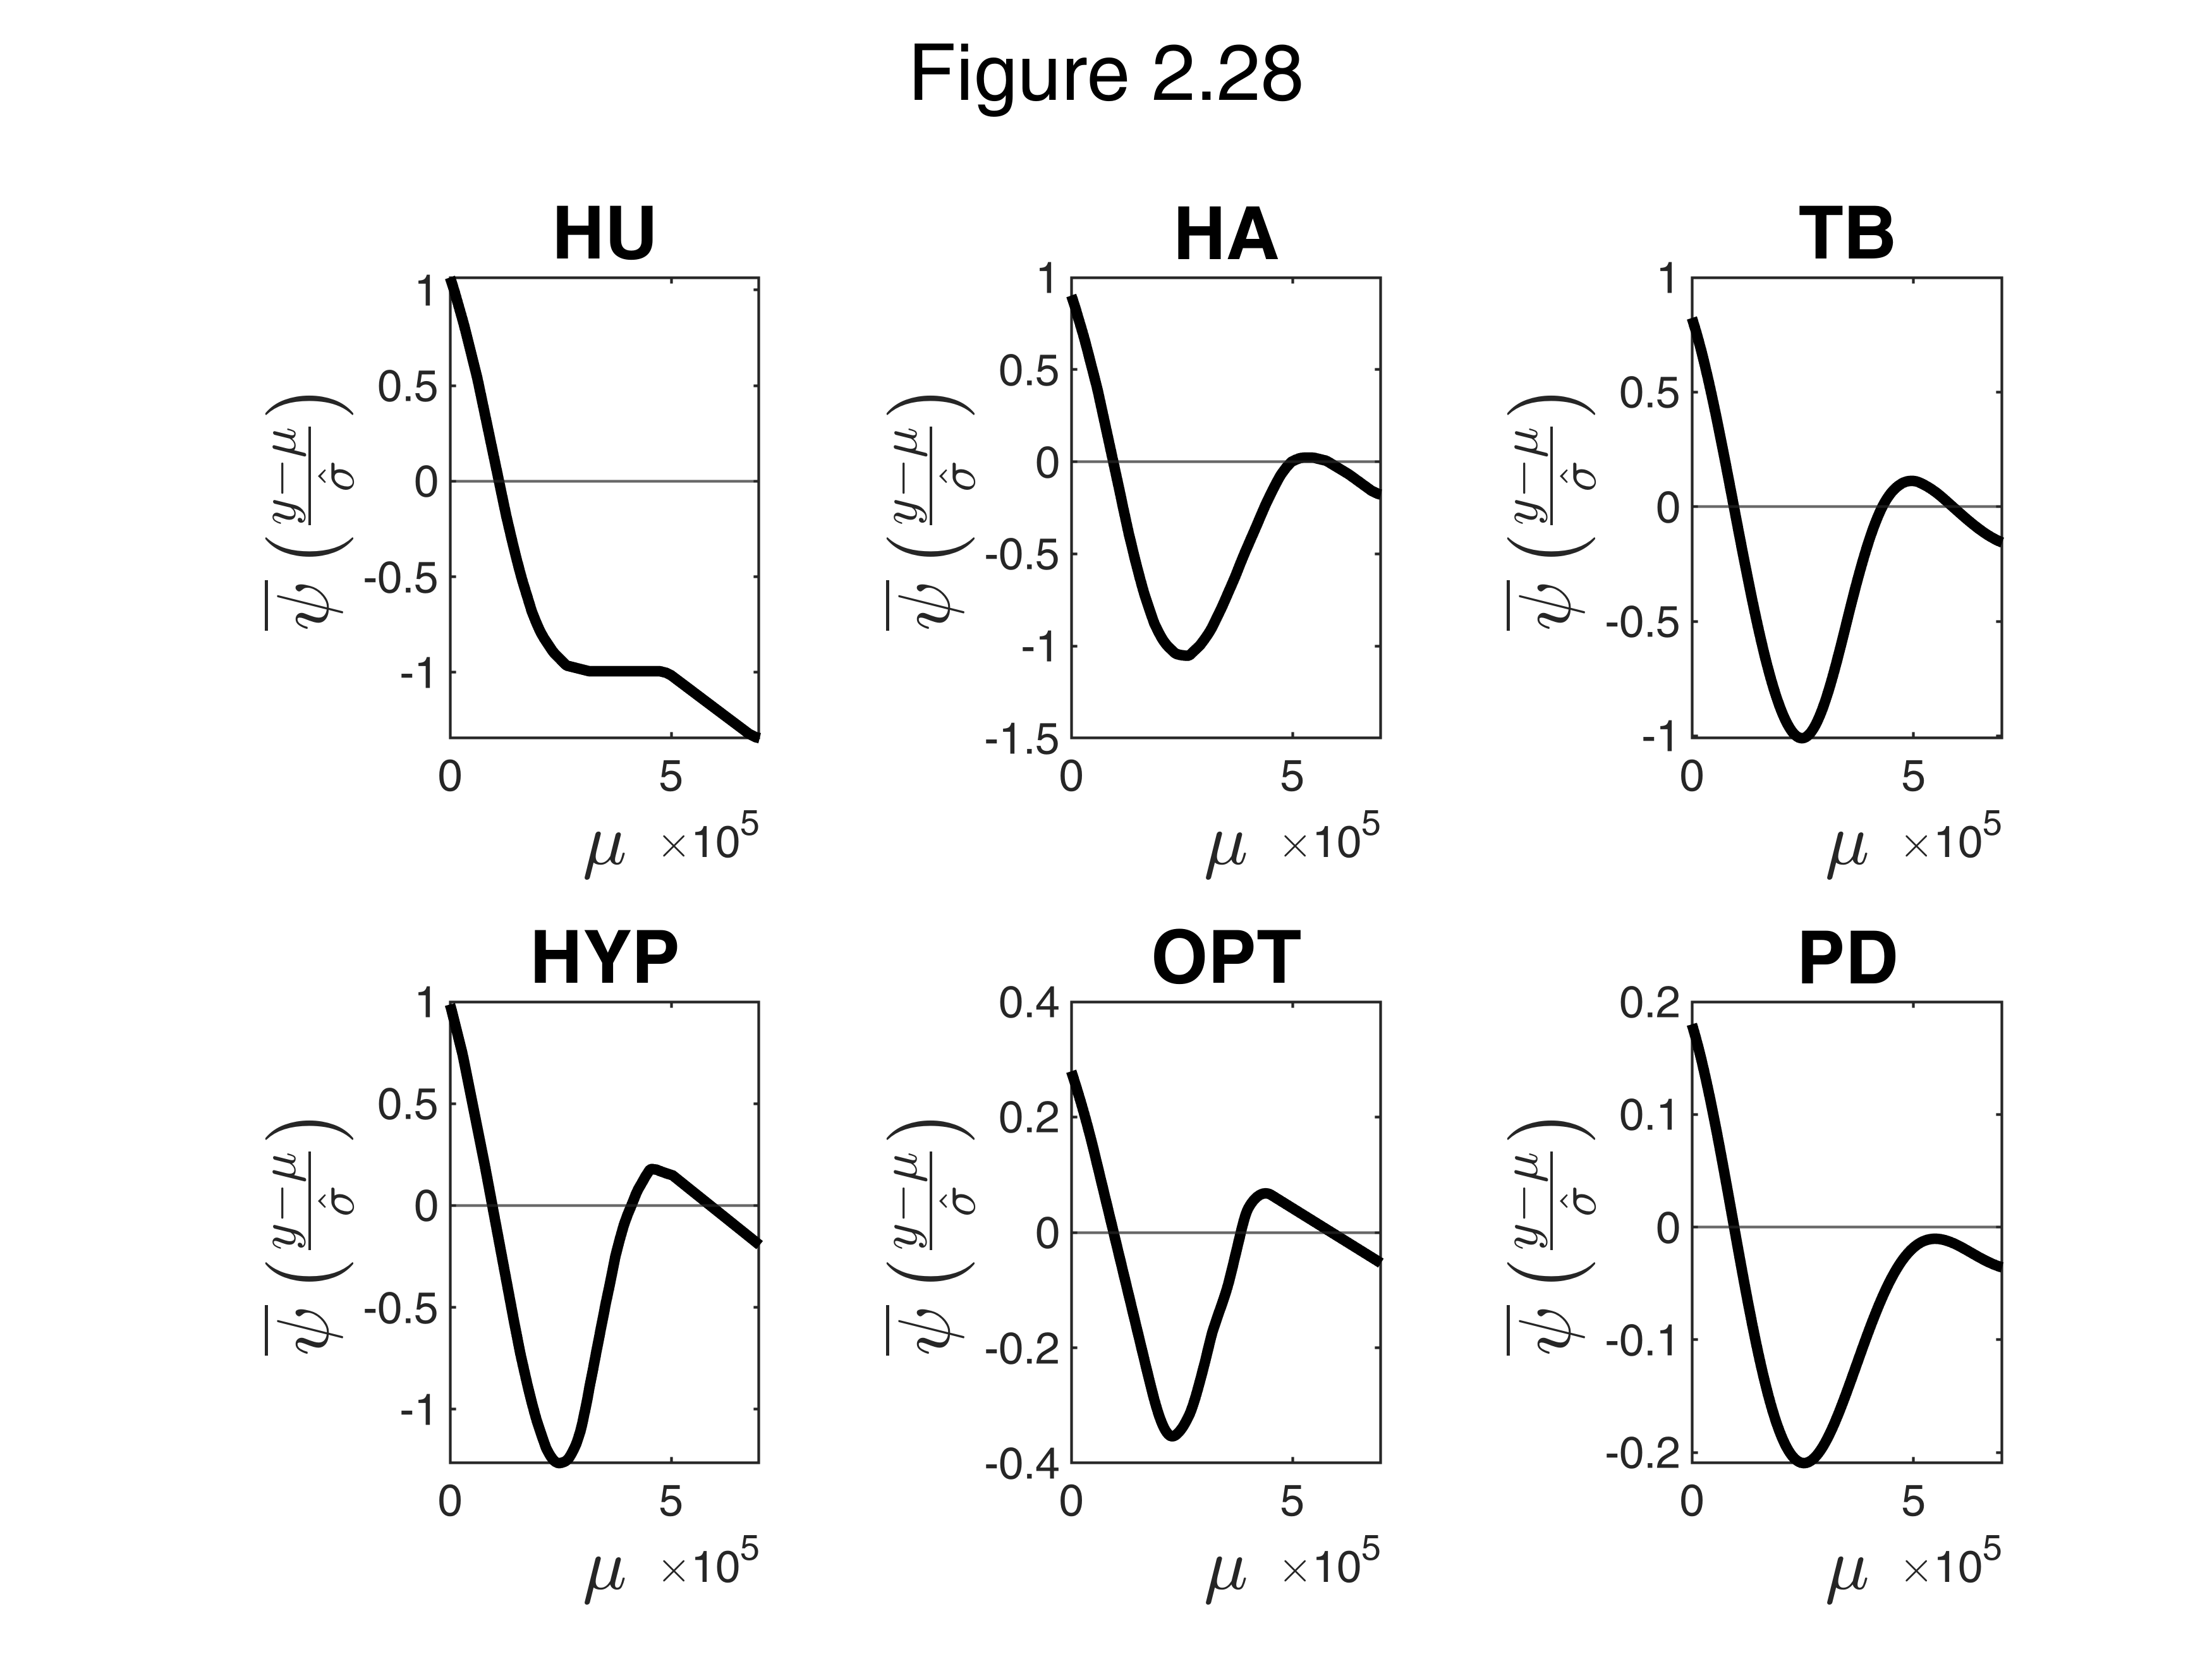

In [2]:
Link={'HU', 'HA', 'TB', 'HYP' 'OPT' 'PD'} ;
for i=1:6
    subplot(2,3,i)
    plot(mu',avePSI(:,i),'LineWidth',2,'Color','k')
    hold('on')
    yline(0) %  line([min(mu);max(mu)],[0;0],'LineStyle',':')
    title(Link(i),'FontSize',14)
    xlabel(' $\mu$ ','FontSize',14,'Interpreter','Latex')
    ylabel(' $\overline \psi \left( \frac{ y -\mu}{\hat \sigma} \right)$ ','FontSize',14,'Interpreter','Latex')
end

if prin==1
    % print to postscript
    print -depsc multsol.eps;
else
    sgtitle('Figure 2.28')
    set(gcf,"Name",'Figure 2.28')
end

In [3]:

%InsideREADME